In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('loan_data_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:

"""Encoding Categorical Values"""
#Loan Status Encoding
df['Loan_Status'] = df.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)

#Gender Encoding
df= df.replace({"Gender":{"Male":1, "Female":0 }})

#Married Encoding
df =df.replace({"Married" :{"Yes":1, "No":0}})

#Replace the 3+ in dependents ande make the column numeric
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents']=pd.to_numeric(df['Dependents'], errors='coerce')

#Count the quantity of values on the column
df['Self_Employed'].value_counts()
df= df.replace({"Self_Employed":{"Yes":1, "No":0 }})

#Education Encoding
df['Education'].value_counts()
df= df.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

#Drop the Loan ID column
df = df.drop(columns=['Loan_ID'])

#Property Area Encoding
df['Property_Area'].value_counts()
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

print(df)


     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0          1            0.0             5849   
1       1.0      1.0         1.0          1            0.0             4583   
2       1.0      1.0         0.0          1            1.0             3000   
3       1.0      1.0         0.0          0            0.0             2583   
4       1.0      0.0         0.0          1            0.0             6000   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0          1            0.0             2900   
610     1.0      1.0         3.0          1            0.0             4106   
611     1.0      1.0         1.0          1            0.0             8072   
612     1.0      1.0         2.0          1            0.0             7583   
613     0.0      0.0         0.0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

C:\Users\harih\AppData\Local\Temp\ipykernel_20432\971785768.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df= df.replace({"Gender":{"Male":1, "Female":0 }})
C:\Users\harih\AppData\Local\Temp\ipykernel_20432\971785768.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df =df.replace({"Married" :{"Yes":1, "No":0}})
C:\Users\harih\AppData\Local\Temp\ipykernel_20432\971785768.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call

In [5]:
df.fillna(df.median(), inplace=True)
columns = df.columns
for column in columns:
  df[column] = pd.to_numeric(df[column], errors='coerce')

In [6]:
col_names= df.columns.tolist()
for column in col_names:
  print("Values that is null <{0}>: <{1}>".format(column,df[column].isnull().sum()))

Values that is null <Gender>: <0>
Values that is null <Married>: <0>
Values that is null <Dependents>: <0>
Values that is null <Education>: <0>
Values that is null <Self_Employed>: <0>
Values that is null <ApplicantIncome>: <0>
Values that is null <CoapplicantIncome>: <0>
Values that is null <LoanAmount>: <0>
Values that is null <Loan_Amount_Term>: <0>
Values that is null <Credit_History>: <0>
Values that is null <Property_Area>: <0>
Values that is null <Loan_Status>: <0>


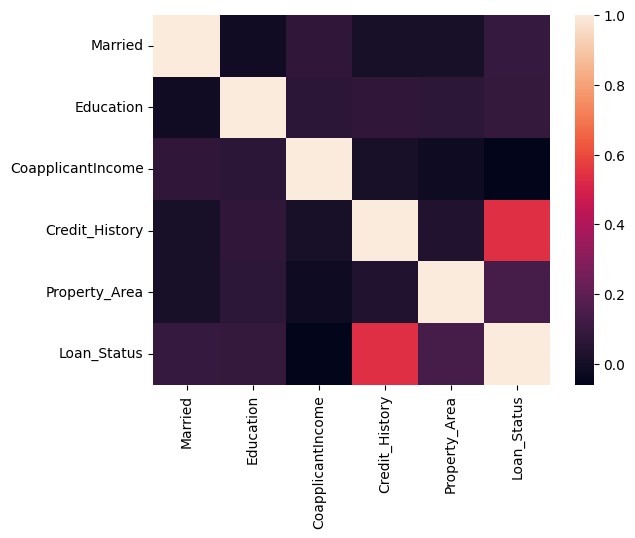

In [18]:
sns.heatmap(df.corr())
plt.show()


In [8]:
def correlationdrop(df, sl):
  columns = df.columns
  for column in columns:
      C=abs(df[column].corr(df['Loan_Status']))
      if C < sl:
        df=df.drop(columns=[column])
  return df

df= correlationdrop(df,0.05)

print(df)

     Married  Education  CoapplicantIncome  Credit_History  Property_Area  \
0        0.0          1                0.0             1.0              1   
1        1.0          1             1508.0             1.0              0   
2        1.0          1                0.0             1.0              1   
3        1.0          0             2358.0             1.0              1   
4        0.0          1                0.0             1.0              1   
..       ...        ...                ...             ...            ...   
609      0.0          1                0.0             1.0              0   
610      1.0          1                0.0             1.0              0   
611      1.0          1              240.0             1.0              1   
612      1.0          1                0.0             1.0              1   
613      0.0          1                0.0             0.0              2   

     Loan_Status  
0              1  
1              0  
2              1  

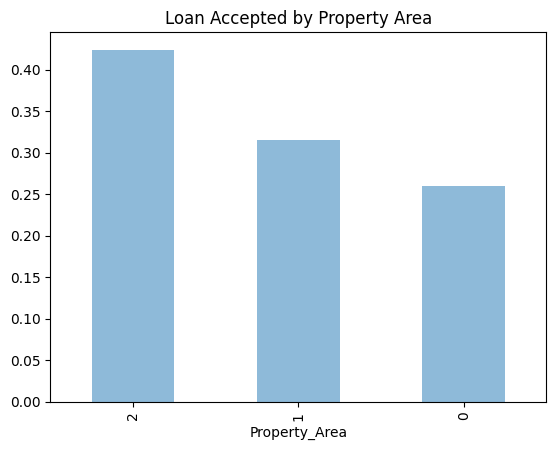

In [9]:
df.Property_Area[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Property Area')
plt.show()

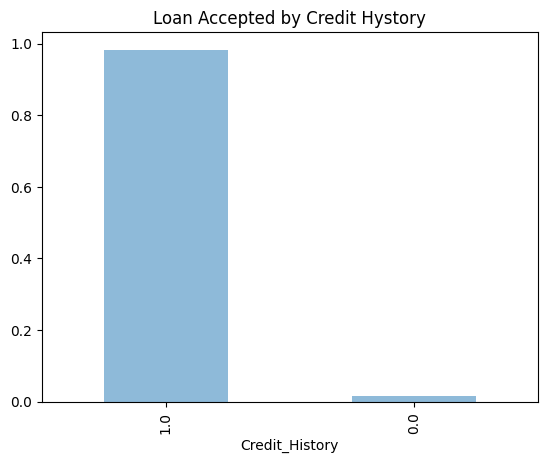

In [10]:
df.Credit_History[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Credit Hystory')
plt.show()

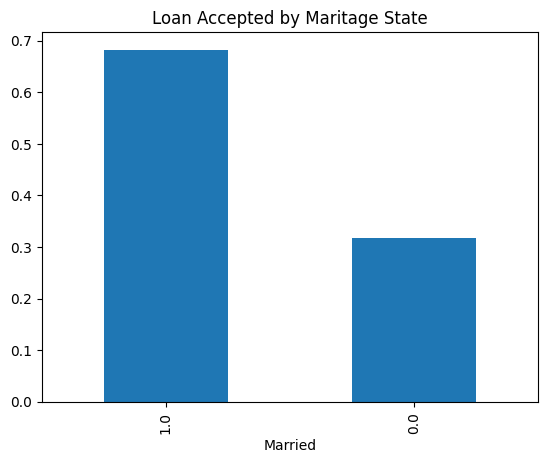

In [11]:
df.Married[df.Loan_Status==1].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Loan Accepted by Maritage State')
plt.show()

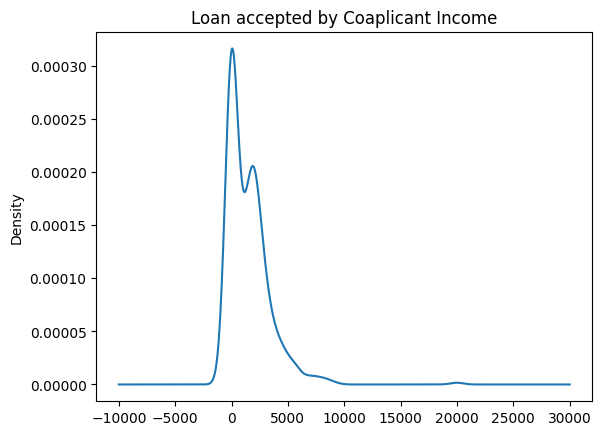

In [12]:
df.CoapplicantIncome[df.Loan_Status==1].plot(kind='kde')
plt.title('Loan accepted by Coaplicant Income')
plt.show()

In [13]:
"""Choose the dependent and independent columns
"""

x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
"""**Scaling the data**"""

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(x)

In [15]:
"""**Split the data on the train and test datasets**"""

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(f"{cm[0][0]} {cm[0][1]}")
print(f"{cm[1][0]} {cm[1][1]}")

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Confusion Matrix: 
14 19
2 88

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

Accuracy: 80.44 %
Standard Deviation: 4.59 %
